In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#plt.style.use('seaborn-whitegrid')
#plt.style.use("seaborn-v0_8-whitegrid")
#plt.style.use("seaborn-v0_8")
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

In [3]:
# datan alkutarkistus
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               81 non-null     float64
 5   years_of_service        80 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           81 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  healtcare               47 non-null     float64
 13  holidayCabin            20 non-null     float64
 14  gym                     9 non-null      floa

In [4]:
df.describe()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [6]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [7]:
df.tail()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN
81,82,2,35,2,3.0,15.0,2183,3,4.0,4,3,4,1.0,NaN,NaN,NaN


In [8]:

# datan siivous, pudotetaan pois eka ja 4 vikaa saraketta
df=df.drop(columns= ['number', 'healtcare', 'holidayCabin', 'gym', 'muscleCare'])
df.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [9]:
# tarkistetaan datasetti uudestaan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  82 non-null     int64  
 1   age                     82 non-null     int64  
 2   family                  82 non-null     int64  
 3   education               81 non-null     float64
 4   years_of_service        80 non-null     float64
 5   salary                  82 non-null     int64  
 6   sat_management          82 non-null     int64  
 7   sat_colleques           81 non-null     float64
 8   sat_workingEnvironment  82 non-null     int64  
 9   sat_salary              82 non-null     int64  
 10  sat_tasks               82 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.2 KB


In [18]:
df.isnull().sum()


gender                    0
age                       0
family                    0
education                 1
years_of_service          2
salary                    0
sat_management            0
sat_colleques             1
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

In [19]:
df.count()

gender                    82
age                       82
family                    82
education                 81
years_of_service          80
salary                    82
sat_management            82
sat_colleques             81
sat_workingEnvironment    82
sat_salary                82
sat_tasks                 82
dtype: int64

In [20]:
for var in df:
    print(var, df[var].unique())

gender [1 2]
age [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
family [1 2]
education [ 1.  2.  3.  4. nan]
years_of_service [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 nan 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]
salary [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
sat_management [3 1 2 4 5]
sat_colleques [ 3.  5.  4.  2. nan]
sat_workingEnvironment [3 2 1 5 4]
sat_salary [3 1 2 4 5]
sat_tasks [3 2 4 1 5]


In [14]:
# Family / perhemuuttuja - luokkamuuttuja
# single = 1
# not single = 2

df.nlargest(n = 3, columns = 'family')
# en ymmärrä mitä iloa tästä on, mutta siis top kolme "ei sinkkua"

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
5,2,31,2,2.0,14.0,1910,4,4.0,5,2,4


In [21]:
df.nsmallest(n = 3, columns = 'family')
# samoin tämä, kolme "alinta" sinkkua

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [23]:
df_family=pd.crosstab(df['family'], 'Count')

In [24]:
df_family
# sinkkumittarin jakautuminen
# single = 1
# not single = 2

col_0,Count
family,
1,31
2,51


In [26]:
df_family.index=['sinkku', 'ei-sinkku']
df_family.columns.name=''
df_family

,Count
sinkku,31
ei-sinkku,51


In [ ]:
# TÄTÄ EI ILMEISESTI SAANUT KÄYTTÄÄ MUTTA KOKEILLAAN NYT KUITENKIN
df_family.plot.barh()

Text(0.5, 0, 'vastaajia, N=102')

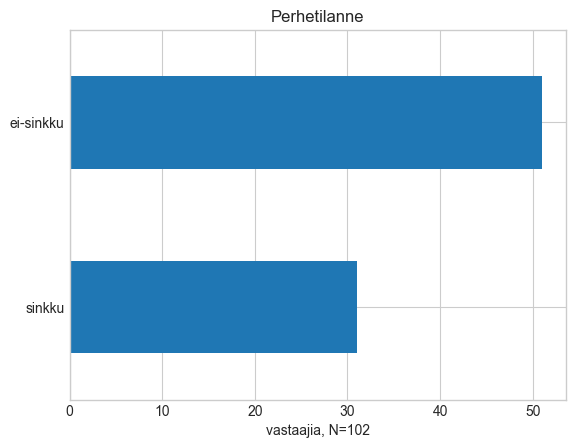

In [28]:
# TÄTÄ EI ILMEISESTI SAANUT KÄYTTÄÄ MUTTA KOKEILLAAN NYT KUITENKIN
df_family.plot.barh(legend = False)

plt.title('Perhetilanne')
plt.xlabel('vastaajia, N=102')

In [29]:
# perhestatus prosentteina

df_family_prosentti = pd.crosstab(df['family'], 'määrä')
df_family_prosentti['%'] = df_family_prosentti['määrä'] / df_family_prosentti['määrä'].sum() * 100
df_family_prosentti.index = ['perheetön', 'perheellinen']
df_family_prosentti.columns.name = ''
df_family_prosentti

,määrä,%
perheetön,31,37.804878
perheellinen,51,62.195122


In [11]:
# years_of_service / työskentelyvuodet - numeerinen muuttuja, joka muutettava luokiteltavaksi muuttujaksi
# the years of service for the company
# täällä on kaksi riviä, joissa ei ole lainkaan arvoa - etsi ja tarkista

In [30]:
df.nlargest(n = 3, columns = 'years_of_service')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
56,1,61,2,2.0,36.0,3119,2,NaN,2,1,5
44,1,55,2,1.0,35.0,2651,4,5.0,4,2,4
45,2,51,2,1.0,28.0,1989,3,3.0,2,2,3


In [31]:
df.nsmallest(n = 3, columns = 'years_of_service')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
7,1,55,1,1.0,0.0,2066,3,5.0,3,1,3
35,1,31,2,3.0,0.0,1559,2,4.0,3,1,3
61,1,40,2,1.0,0.0,1872,2,3.0,1,2,3


TypeError: '<=' not supported between instances of 'int' and 'numpy.str_'